In [29]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


In [2]:
  ## get Data 
btc_data=pd.read_csv('BTC-USD.csv')
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-06,10982.543945,11620.964844,10982.543945,11208.550781,11208.550781,21092024306
1,2019-07-07,11217.616211,11541.620117,11148.804688,11450.846680,11450.846680,19369044276
2,2019-07-08,11446.596680,12345.833008,11393.374023,12285.958008,12285.958008,23482551458
3,2019-07-09,12284.326172,12779.131836,12233.261719,12573.812500,12573.812500,28167921522
4,2019-07-10,12571.537109,13129.529297,11710.978516,12156.512695,12156.512695,33627574244


In [8]:
#filter only for Date and Open Prices to our dataframe
df=btc_data[['Date','Close']]
# set Month column as an index 
df.set_index('Date',inplace=True)
# convert index to datetime 
df.index=pd.to_datetime(df.index)
#show the df 
df.head()

,Close
Date,
2019-07-06,11208.550781
2019-07-07,11450.846680
2019-07-08,12285.958008
2019-07-09,12573.812500
2019-07-10,12156.512695


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2019-07-06 to 2020-07-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   367 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,367.0,8809.797931,1396.97143,4970.788086,7661.308594,8942.808594,9729.562988,12573.8125


In [12]:
# sort the datetime index 
df=df.sort_index()
df.tail()

,Close
Date,
2020-07-02,9123.410156
2020-07-03,9087.303711
2020-07-04,9132.488281
2020-07-05,9073.942383
2020-07-06,9268.145508


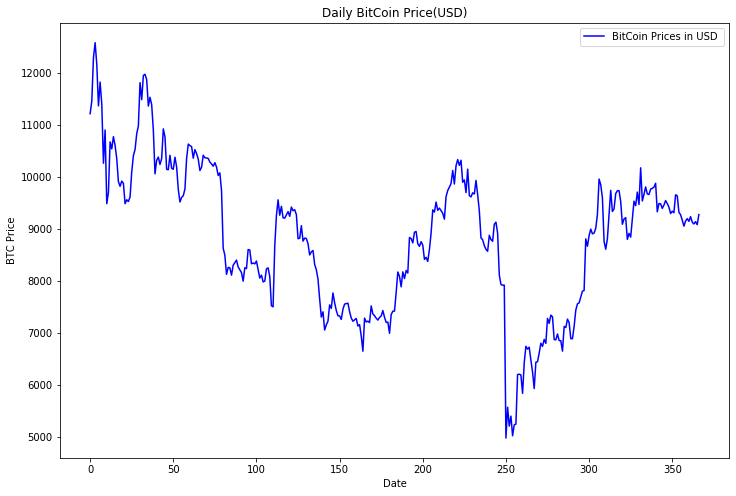

In [15]:
# plot the open price over time 
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(12,8))  # create figure & 1 axis
ax.plot(df.values, color='blue', label='BitCoin Prices in USD ')
plt.title('Daily BitCoin Price(USD)')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()
plt.show()
fig.savefig('BTC_Price.png')
plt.close(fig)

In [16]:
df.shape

(367, 1)

In [17]:
# split data into train and test set 
train=df.head(307)
test=df.tail(60)
train.shape,test.shape

((307, 1), (60, 1))

In [18]:
# Normalizind price values between =(0,1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train_scaled=scaler.transform(train)
test_scaled=scaler.transform(test)

In [23]:
features_set = []
labels = []
for i in range(60,len(train)):
    features_set.append(train_scaled[i-60:i, 0])
    labels.append(train_scaled[i, 0])
#convert the two lists to arrays for training 
features_set, labels = np.array(features_set), np.array(labels)

In [24]:
#reshape features set for training in the neural network  
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [28]:
features_set.shape

(247, 60, 1)

In [30]:
#build our Model 
model = Sequential()
# first LSTM 
model.add(LSTM(units=64, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.4))
#second LSTM
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.4))
#third LSTM
model.add(LSTM(units=32))
model.add(Dropout(0.4))
#Dense layer/output is only one 
model.add(Dense(units = 1))
#compile 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [31]:
# train the model 
history=model.fit(features_set, labels, epochs =100, batch_size = 32,verbose=2)


Epoch 1/100
 - 4s - loss: 0.0933
Epoch 2/100
 - 1s - loss: 0.0249
Epoch 3/100
 - 1s - loss: 0.0236
Epoch 4/100
 - 2s - loss: 0.0203
Epoch 5/100
 - 2s - loss: 0.0189
Epoch 6/100
 - 2s - loss: 0.0169
Epoch 7/100
 - 2s - loss: 0.0195
Epoch 8/100
 - 2s - loss: 0.0173
Epoch 9/100
 - 2s - loss: 0.0201
Epoch 10/100
 - 2s - loss: 0.0176
Epoch 11/100
 - 2s - loss: 0.0149
Epoch 12/100
 - 2s - loss: 0.0163
Epoch 13/100
 - 2s - loss: 0.0168
Epoch 14/100
 - 2s - loss: 0.0162
Epoch 15/100
 - 2s - loss: 0.0132
Epoch 16/100
 - 2s - loss: 0.0145
Epoch 17/100
 - 2s - loss: 0.0139
Epoch 18/100
 - 2s - loss: 0.0148
Epoch 19/100
 - 2s - loss: 0.0156
Epoch 20/100
 - 2s - loss: 0.0135
Epoch 21/100
 - 2s - loss: 0.0133
Epoch 22/100
 - 1s - loss: 0.0126
Epoch 23/100
 - 2s - loss: 0.0118
Epoch 24/100
 - 2s - loss: 0.0143
Epoch 25/100
 - 2s - loss: 0.0128
Epoch 26/100
 - 1s - loss: 0.0124
Epoch 27/100
 - 1s - loss: 0.0130
Epoch 28/100
 - 1s - loss: 0.0137
Epoch 29/100
 - 2s - loss: 0.0120
Epoch 30/100
 - 2s - lo

Text(0.5, 0, 'epochs')

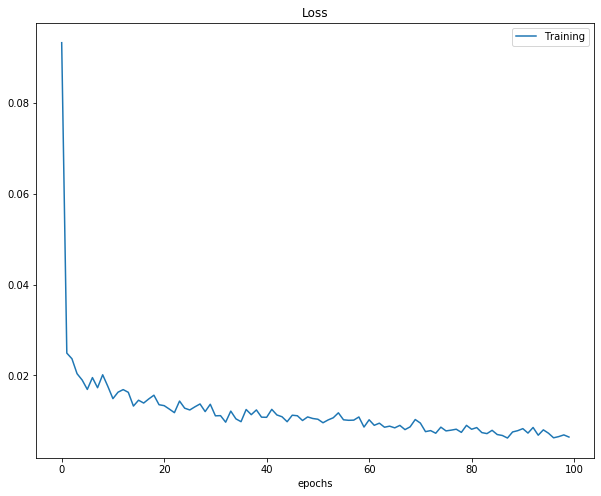

In [32]:
# Plot training loss vs validation loss 
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.legend(['Training'])
plt.title('Loss')
plt.xlabel('epochs')

In [33]:
# Testing the model 
## prepare test data 
test_inputs = df[len(df) - len(test) - 60:].values
## reshape
test_inputs = test_inputs.reshape(-1,1)
## then,scale
test_inputs = scaler.transform(test_inputs)
test_inputs

array([[0.38837919],
       [0.38654899],
       [0.38677267],
       [0.        ],
       [0.07798462],
       [0.03019563],
       [0.055442  ],
       [0.00574665],
       [0.03351841],
       [0.03520315],
       [0.1605157 ],
       [0.16151339],
       [0.15970991],
       [0.11304275],
       [0.19012524],
       [0.23201499],
       [0.22494665],
       [0.22959973],
       [0.19715973],
       [0.16722369],
       [0.12511533],
       [0.19190438],
       [0.19306218],
       [0.21517599],
       [0.23975149],
       [0.23182868],
       [0.24947168],
       [0.23942331],
       [0.30264182],
       [0.29009856],
       [0.31083822],
       [0.30662814],
       [0.24920413],
       [0.24836102],
       [0.26309316],
       [0.24651368],
       [0.24617041],
       [0.21982328],
       [0.28225822],
       [0.27954619],
       [0.30078517],
       [0.29180976],
       [0.25136976],
       [0.25115468],
       [0.28231126],
       [0.32341558],
       [0.33935348],
       [0.341

In [34]:
len(test_inputs)

120

In [37]:
test_features = []
for i in range(60, len(test_inputs)):
    test_features.append(test_inputs[i-60:i, 0])
#to array
test_features = np.array(test_features)
#reshape for LSTM
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [38]:
# now, Let's predict 
predictions = model.predict(test_features)
#inverse to original values 
predictions = scaler.inverse_transform(predictions)

In [39]:
predictions

array([[9154.756],
       [9356.445],
       [9515.211],
       [9475.11 ],
       [9263.04 ],
       [9010.853],
       [8861.948],
       [8897.621],
       [9012.068],
       [9139.092],
       [9277.954],
       [9409.498],
       [9510.563],
       [9539.17 ],
       [9443.491],
       [9287.714],
       [9135.547],
       [8966.579],
       [8823.352],
       [8717.259],
       [8698.47 ],
       [8797.154],
       [8953.034],
       [9143.67 ],
       [9285.955],
       [9457.99 ],
       [9544.66 ],
       [9555.969],
       [9540.358],
       [9501.546],
       [9453.78 ],
       [9426.311],
       [9424.602],
       [9444.545],
       [9485.099],
       [9451.803],
       [9379.717],
       [9301.387],
       [9226.901],
       [9177.888],
       [9169.646],
       [9183.806],
       [9195.713],
       [9180.685],
       [9151.195],
       [9115.776],
       [9132.342],
       [9190.356],
       [9218.232],
       [9198.67 ],
       [9133.723],
       [9035.03 ],
       [8946

In [40]:
len(predictions)

60

In [42]:
#get the root mean squared error 
rmse=np.sqrt(np.mean(np.power((test-predictions),2)))
print("RMSE: ",rmse)

RMSE:  Close    390.399484
dtype: float64


In [43]:
train.shape

(307, 1)

C:\Users\hp\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


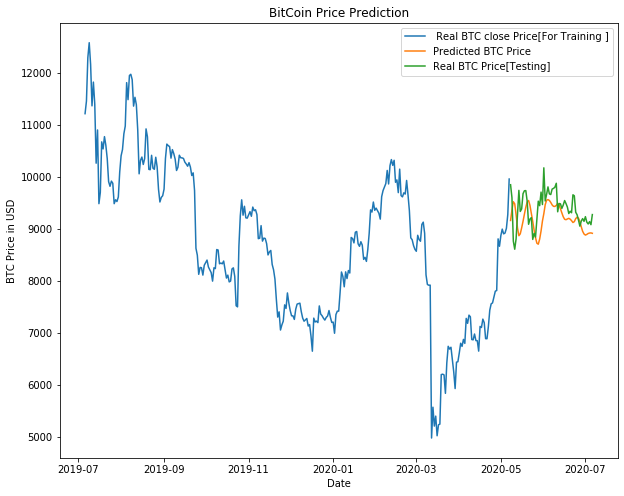

In [49]:
test['Predictions'] = predictions
#plot the predictions versus 
fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(10,8))  # create figure & 1 axis
ax.plot(train['Close'],label=' Real BTC close Price[For Training ]')
ax.plot(test['Predictions'],label='Predicted BTC Price')
ax.plot(test['Close'],label='Real BTC Price[Testing]')
plt.title('BitCoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('BTC Price in USD')
plt.legend()
plt.show()
fig.savefig('btc_prediction.png')
plt.close(fig) 

In [51]:
#END